# Count rate analysis for trapped and GCR protons
By Andrei R. Hanu - <andrei.hanu@nasa.gov>

## Introduction

We can estimate the expected count rate (number of particled per unit time) recorded by the CNP-TEPC instrument by integrating the energy dependent geometric factor and an assumed energy depended differential flux. In this approach, the count rates may be expressed as:


In [1]:
# Matplotlib - 2D plotting library
from matplotlib import pyplot as plt
from matplotlib import rcParams

# Show matplotlib figures inline the notebook
%matplotlib inline

# Pandas - High-performance data analysis
import pandas

# Glob - Unix style pathname pattern expansion
# Used to aggregate folders and files into a single list so they can be iterated over
import glob

# Numpy - For handling of large, multi-dimensional arrays and matrices
import numpy as np

# Divide integers
from __future__ import division

# Scipy - For accurate integration
from scipy.integrate import simps, trapz
from scipy.interpolate import interp1d

##########################################################################################
# Setting rcParams for publication quality graphs
fig_width_pt = 246.0                    # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # Width in inches
fig_height = fig_width*golden_mean      # Height in inches
fig_size =  [fig_width, fig_height]
# fig_size =  [7.3,4.2]
fig_size =  [7.3*1.25,4.2*1.25]
# fig_size =  [7.3*1.5,4.2*1.5]
# fig_size =  [7.3*2,4.2*2]
params = {'backend': 'pdf',
        'axes.labelsize': 10,
        'legend.fontsize': 9,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'xtick.major.size': 6,
        'xtick.major.width': 1,
        'xtick.minor.size': 2.5,
        'xtick.minor.width': 1,
        'ytick.major.size': 6,
        'ytick.major.width': 1,
        'ytick.minor.size': 2.5,
        'ytick.minor.width': 1,
        'font.family': 'sans-serif',
        'font.sans-serif': 'Avant Garde',
        'font.size': 10,
        'text.usetex': True,
        'figure.figsize': fig_size}

# Update rcParams
rcParams.update(params)

In [2]:
# Folder & file containing the calculated geometric factors (Simulation)
DataFolder = '../Results/Scint_4mm_PV_1mm_Lid_1mm/Protons/'
DataFilename = 'Geometric_Factor_Protons.csv'

# Readout CSV file
try:
    DataGF = pandas.read_csv(DataFolder+DataFilename,skiprows=1,index_col=0,
                            engine='python', 
                            names=('Energy (keV)',
                                   'GF Total (cm^2 sr)',
                                   'GF Total (cm^2 sr) Error',
                                   'GF Coinc (cm^2 sr)',
                                   'GF Coinc (cm^2 sr) Error',
                                   'GF Anti-Coinc (cm^2 sr)',
                                   'GF Anti-Coinc (cm^2 sr) Error'))
    
    print DataGF
except:
    print "Cannot find or read file",DataFilename,"containing the geometric factors."

              GF Total (cm^2 sr)  GF Total (cm^2 sr) Error  \
Energy (keV)                                                 
10                      0.002096                  0.000070   
11                      0.002779                  0.000081   
13                      0.004211                  0.000100   
15                      0.006886                  0.000128   
18                      0.010877                  0.000161   
21                      0.014687                  0.000187   
25                      0.016641                  0.000199   
29                      0.018550                  0.000210   
34                      7.877934                  0.004315   
40                     21.092348                  0.024893   
47                    112.462734                  0.388848   
55                    141.683083                  0.286067   
65                    148.593229                  0.143002   
76                    154.557338                  0.094393   
88      

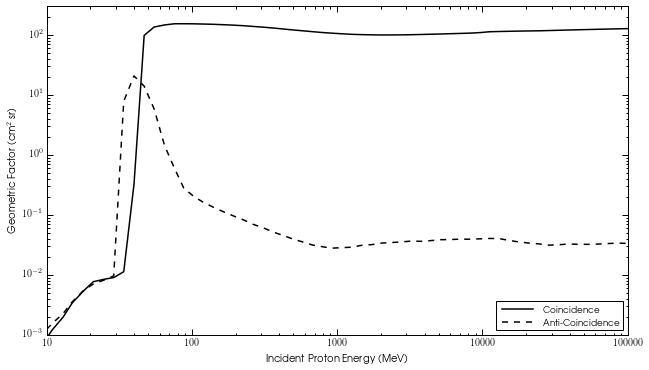

In [3]:
##########################################################################################
# Plot the Geometry Factor over a range of particle energies
figG, axG = plt.subplots(1,1)
try: 
    plt.loglog(DataGF.index, DataGF['GF Coinc (cm^2 sr)'], 'k-', linewidth=1.5, label="Coincidence")
    plt.loglog(DataGF.index, DataGF['GF Anti-Coinc (cm^2 sr)'], 'k--', linewidth=1.5, label="Anti-Coincidence")
except:
    pass
# Figure Properties
axG.set_ylabel(r'Geometric Factor (cm$^2$ sr)')  
axG.set_xlabel('Incident Proton Energy (MeV)') 
axG.set_ylim(0.001, 300.)
axG.set_xlim(1E1, 1E5)

from matplotlib.ticker import ScalarFormatter
axG.xaxis.set_major_formatter(ScalarFormatter())

axG.legend(loc='lower right',handlelength=4)

# Tight Layout
plt.tight_layout()

# Show the figure
plt.show(figG)

In [4]:
# Filename containing SPENVIS trapped particle flux information
SPENVISDataFolder = '../Results/Scint_4mm_PV_1mm_Lid_1mm/'
SPENVISTrappedDataFilename = 'SPENVIS_500km_SSO_Trapped_Electron_Proton.txt'

# Readout the SPENVIS file
try:
    DataSPENVISTrapped = pandas.read_csv(SPENVISDataFolder+SPENVISTrappedDataFilename, skiprows=75, nrows=29, index_col=0, 
                                          names=('Energy (MeV)',
                                                 'IFlux (cm^-2 s^-1)',
                                                 'DFlux (cm^-2 s^-1 MeV^-1)'))
except:
    print "Cannot find or read file",SPENVISTrappedDataFilename,"containing the SPENVIS trapped proton flux."
    
print DataSPENVISTrapped

              IFlux (cm^-2 s^-1)  DFlux (cm^-2 s^-1 MeV^-1)
Energy (MeV)                                               
0.10                   814.12000                5480.400000
0.15                   578.17000                3957.500000
0.20                   418.36000                2680.600000
0.30                   253.39000                1285.300000
0.40                   161.31000                 689.840000
0.50                   115.42000                 377.320000
0.60                    85.84100                 229.130000
0.70                    69.59600                 142.500000
1.00                    44.80300                  60.439000
1.50                    33.08800                  16.807000
2.00                    27.99500                   7.861300
3.00                    24.78100                   2.496800
4.00                    23.00200                   1.375200
5.00                    22.03000                   0.878720
6.00                    21.24400        

In [5]:
# Filename containing SPENVIS GCR proton flux 
SPENVISDataFolder = '../Results/Scint_4mm_PV_1mm_Lid_1mm/'
SPENVISGCRDataFilename = 'SPENVIS_500km_SSO_GCR_Proton.txt'

# Readout the SPENVIS file
try:
    DataSPENVISGCR = pandas.read_csv(SPENVISDataFolder+SPENVISGCRDataFilename, skiprows=89, skipfooter=1, index_col=0, 
                                          names=('Energy (MeV)',
                                                 'IFlux (m^-2 sr^-1 s^-1)',
                                                 'DFlux (m^-2 sr^-1 s^-1 MeV^-1)'))
except:
    print "Cannot find or read file",SPENVISGCRDataFilename,"containing the SPENVIS GCR proton flux."

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.


In [6]:
print DataSPENVISGCR

              IFlux (m^-2 sr^-1 s^-1)  DFlux (m^-2 sr^-1 s^-1 MeV^-1)
Energy (MeV)                                                         
1.0                         945.77000                        0.000112
1.1                         945.77000                        0.000137
1.2                         945.77000                        0.000163
1.4                         945.77000                        0.000224
1.6                         945.77000                        0.000293
1.8                         945.77000                        0.000371
2.0                         945.77000                        0.000458
2.2                         945.77000                        0.000553
2.5                         945.76000                        0.000711
2.8                         945.76000                        0.000887
3.2                         945.76000                        0.001147
3.5                         945.76000                        0.001361
4.0                 

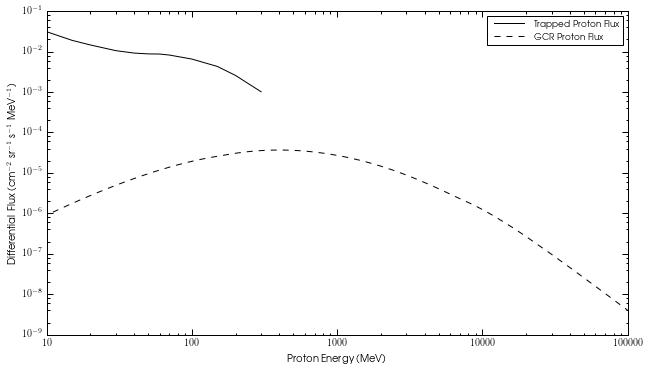

In [7]:
##########################################################################################
# Plot the SPENVIS fluxes
figFlux, axFlux = plt.subplots(1,1)

plt.loglog(DataSPENVISTrapped.index, DataSPENVISTrapped['DFlux (cm^-2 s^-1 MeV^-1)']/(4*np.pi), 'k-', linewidth=1., label="Trapped Proton Flux")
plt.loglog(DataSPENVISGCR.index, DataSPENVISGCR['DFlux (m^-2 sr^-1 s^-1 MeV^-1)']/1E4, 'k--', linewidth=1., label="GCR Proton Flux")

# Figure Properties
axFlux.set_ylabel('Differential Flux (cm$^{-2}$ sr$^{-1}$ s$^{-1}$ MeV$^{-1}$)')  
axFlux.set_xlabel('Proton Energy (MeV)') 
axFlux.set_ylim(1E-9, 1E-1)
axFlux.set_xlim(1E1, 1E5)

from matplotlib.ticker import ScalarFormatter
axFlux.xaxis.set_major_formatter(ScalarFormatter())

axFlux.legend(loc='upper right',handlelength=4)

# Tight Layout
plt.tight_layout()

# Show the figure
plt.show(figFlux)

In [8]:
##########################################################################################
# Calculate the differential count rate from trapped protons
DCount_Trapped = pandas.DataFrame(index = DataGF.index.values,
                          columns = ('DCount Coinc (s^-1 MeV^-1)', 
                                     'DCount Coinc (s^-1 MeV^-1) Error',
                                     'DCount Anti-Coinc (s^-1 MeV^-1)', 
                                     'DCount Anti-Coinc (s^-1 MeV^-1) Error'))

# Loop through the geometric factors and interpolate the flux as necessary
for index, row in DataGF.iterrows():
    # Linearly interpolate the flux
    flux = interp1d(DataSPENVISTrapped.index.values, DataSPENVISTrapped['DFlux (cm^-2 s^-1 MeV^-1)'].values,
                    bounds_error=False,
                    fill_value=0.)
        
    # Calculate the differential count rates
    DCount_COINC = flux(index)*DataGF.loc[index]['GF Coinc (cm^2 sr)']/(4*np.pi)
    DCount_COINC_Err = DCount_COINC*DataGF.loc[index]['GF Coinc (cm^2 sr) Error']/DataGF.loc[index]['GF Coinc (cm^2 sr)']
    DCount_ANTICOINC = flux(index)*DataGF.loc[index]['GF Anti-Coinc (cm^2 sr)']/(4*np.pi)
    DCount_ANTICOINC_Err = DCount_ANTICOINC*DataGF.loc[index]['GF Anti-Coinc (cm^2 sr) Error']/DataGF.loc[index]['GF Anti-Coinc (cm^2 sr)']
            
    # Add results to the PANDAS dataframe
    DCount_Trapped.loc[index]['DCount Coinc (s^-1 MeV^-1)'] = DCount_COINC
    DCount_Trapped.loc[index]['DCount Coinc (s^-1 MeV^-1) Error'] = DCount_COINC_Err
    DCount_Trapped.loc[index]['DCount Anti-Coinc (s^-1 MeV^-1)'] = DCount_ANTICOINC
    DCount_Trapped.loc[index]['DCount Anti-Coinc (s^-1 MeV^-1) Error'] = DCount_ANTICOINC_Err

print DCount_Trapped

       DCount Coinc (s^-1 MeV^-1) DCount Coinc (s^-1 MeV^-1) Error  \
10                    2.72278e-05                      1.41742e-06   
11                    3.49675e-05                      1.54235e-06   
13                    4.67942e-05                      1.62621e-06   
15                    6.38989e-05                       1.6957e-06   
18                     8.8238e-05                      1.85038e-06   
21                    0.000108949                      1.91641e-06   
25                    0.000106151                      1.78034e-06   
29                    9.84199e-05                      1.59995e-06   
34                    0.000112569                      1.63556e-06   
40                     0.00297542                         2.85e-05   
47                       0.877054                       0.00325132   
55                        1.18807                       0.00245315   
65                         1.2467                       0.00120595   
76                  

In [9]:
##########################################################################################
# Calculate the differential count rate from GCR protons
DCount_GCR = pandas.DataFrame(index = DataGF.index.values,
                          columns = ('DCount Coinc (s^-1 MeV^-1)', 
                                     'DCount Coinc (s^-1 MeV^-1) Error',
                                     'DCount Anti-Coinc (s^-1 MeV^-1)', 
                                     'DCount Anti-Coinc (s^-1 MeV^-1) Error'))

# Loop through the geometric factors and interpolate the flux as necessary
for index, row in DataGF.iterrows():
    # Linearly interpolate the flux
    flux = interp1d(DataSPENVISGCR.index.values, DataSPENVISGCR['DFlux (m^-2 sr^-1 s^-1 MeV^-1)'].values,
                    bounds_error=False,
                    fill_value=0.)
        
    # Calculate the differential count rates
    DCount_COINC = flux(index)*DataGF.loc[index]['GF Coinc (cm^2 sr)']/1E4
    DCount_COINC_Err = DCount_COINC*DataGF.loc[index]['GF Coinc (cm^2 sr) Error']/DataGF.loc[index]['GF Coinc (cm^2 sr)']
    DCount_ANTICOINC = flux(index)*DataGF.loc[index]['GF Anti-Coinc (cm^2 sr)']/1E4
    DCount_ANTICOINC_Err = DCount_ANTICOINC*DataGF.loc[index]['GF Anti-Coinc (cm^2 sr) Error']/DataGF.loc[index]['GF Anti-Coinc (cm^2 sr)']
            
    # Add results to the PANDAS dataframe
    DCount_GCR.loc[index]['DCount Coinc (s^-1 MeV^-1)'] = DCount_COINC
    DCount_GCR.loc[index]['DCount Coinc (s^-1 MeV^-1) Error'] = DCount_COINC_Err
    DCount_GCR.loc[index]['DCount Anti-Coinc (s^-1 MeV^-1)'] = DCount_ANTICOINC
    DCount_GCR.loc[index]['DCount Anti-Coinc (s^-1 MeV^-1) Error'] = DCount_ANTICOINC_Err

print DCount_GCR

       DCount Coinc (s^-1 MeV^-1) DCount Coinc (s^-1 MeV^-1) Error  \
10                    7.90896e-10                      4.11724e-11   
11                    1.29325e-09                      5.70428e-11   
13                    2.75053e-09                      9.55874e-11   
15                    5.93496e-09                      1.57497e-10   
18                    1.26271e-08                      2.64794e-10   
21                    2.26928e-08                      3.99164e-10   
25                    3.22319e-08                      5.40587e-10   
29                    4.23584e-08                      6.88593e-10   
34                    6.58749e-08                      9.57121e-10   
40                    2.34301e-06                      2.24425e-08   
47                    0.000872499                      3.23443e-06   
55                     0.00144931                      2.99255e-06   
65                     0.00188782                      1.82612e-06   
76                  

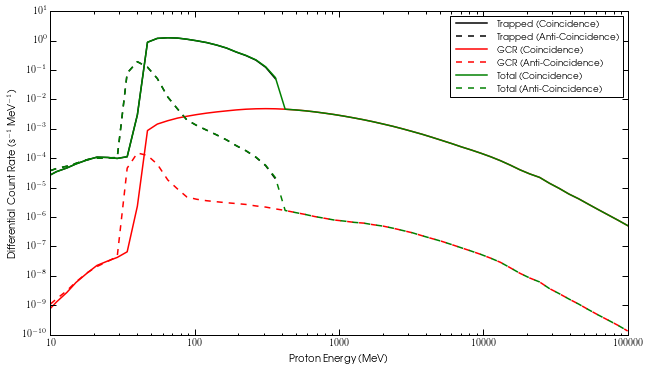

In [10]:
##########################################################################################
# Plot the differential count rates
figDiffCount, axDiffCount = plt.subplots(1,1)

plt.loglog(DCount_Trapped.index, DCount_Trapped['DCount Coinc (s^-1 MeV^-1)'], 'k-', linewidth=1.5, label="Trapped (Coincidence)")
plt.loglog(DCount_Trapped.index, DCount_Trapped['DCount Anti-Coinc (s^-1 MeV^-1)'], 'k--', linewidth=1.5, label="Trapped (Anti-Coincidence)")

plt.loglog(DCount_GCR.index, DCount_GCR['DCount Coinc (s^-1 MeV^-1)'], 'r-', linewidth=1.5, label="GCR (Coincidence)")
plt.loglog(DCount_GCR.index, DCount_GCR['DCount Anti-Coinc (s^-1 MeV^-1)'], 'r--', linewidth=1.5, label="GCR (Anti-Coincidence)")

plt.loglog(DCount_GCR.index, DCount_Trapped['DCount Coinc (s^-1 MeV^-1)'].add(DCount_GCR['DCount Coinc (s^-1 MeV^-1)']), 'g-', linewidth=1.5, label="Total (Coincidence)")
plt.loglog(DCount_GCR.index, DCount_Trapped['DCount Anti-Coinc (s^-1 MeV^-1)'].add(DCount_GCR['DCount Anti-Coinc (s^-1 MeV^-1)']), 'g--', linewidth=1.5, label="Total (Anti-Coincidence)")

# Figure Properties
axDiffCount.set_ylabel('Differential Count Rate (s$^{-1}$ MeV$^{-1}$)')  
axDiffCount.set_xlabel('Proton Energy (MeV)') 
# axDiffCount.set_ylim(1E0, 1E4)
axDiffCount.set_xlim(1E1, 1E5)

from matplotlib.ticker import ScalarFormatter
axDiffCount.xaxis.set_major_formatter(ScalarFormatter())

axDiffCount.legend(loc='upper right',handlelength=4)

# Tight Layout
plt.tight_layout()

# Show the figure
plt.show(figDiffCount)

In [11]:
DCount_Trapped['DCount Coinc (s^-1 MeV^-1)'].add(DCount_GCR['DCount Coinc (s^-1 MeV^-1)'])

10        2.72286e-05
11        3.49688e-05
13         4.6797e-05
15        6.39049e-05
18        8.82506e-05
21        0.000108972
25        0.000106183
29        9.84622e-05
34        0.000112635
40         0.00297776
47           0.877926
55            1.18952
65            1.24859
76            1.21766
88            1.11615
103          0.988594
121          0.856949
142          0.705167
166          0.559771
194          0.409921
226          0.314357
265          0.221651
310          0.128257
362          0.055272
423        0.00463864
495        0.00440425
579        0.00411518
676        0.00378247
791        0.00341666
924         0.0030626
1081       0.00270114
1263       0.00235691
1477       0.00203733
1726       0.00173731
2018       0.00145904
2359       0.00121918
2758      0.000999007
3224      0.000808986
3769      0.000652444
4406      0.000515114
5150      0.000403796
6020      0.000316136
7038      0.000243543
8227      0.000191484
9617      0.000147937
11242     